In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
from zipfile import ZipFile


In [3]:
zip_file = ZipFile("train.csv.zip")

In [4]:
f = zip_file.extractall()

In [5]:
df = pd.read_csv("train.csv",sep=",") 

C:\Users\fjarroyo\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,id,target,var1,var2,var3,var4,var5,var6,var7,var8,...,weatherVar227,weatherVar228,weatherVar229,weatherVar230,weatherVar231,weatherVar232,weatherVar233,weatherVar234,weatherVar235,weatherVar236
0,1,0.0,Z,Z,Z,N1,Z,Z,3,1,...,0.170351,0.0,0.00000,0.000000,1.117353,1.215303,0.112556,2.355737,0.404655,0.138667
1,2,0.0,Z,Z,Z,C1,Z,Z,3,2,...,0.266173,0.0,27.50823,0.000000,3.828979,1.036739,0.033052,0.856632,0.231232,0.742199
2,3,0.0,3,Z,4,J3,B,B,2,4,...,0.979517,0.0,0.00000,0.456134,0.098790,1.076535,0.566352,0.696013,0.693695,0.070654
3,4,0.0,3,Z,4,H1,B,Z,3,4,...,0.308761,0.0,0.00000,4.349042,0.401975,0.340631,0.290147,0.000000,0.000000,0.090332
4,5,0.0,Z,Z,Z,H1,Z,Z,2,4,...,2.171972,0.0,0.00000,0.514990,0.516095,1.016120,1.313732,1.338487,2.948202,0.816485


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452061 entries, 0 to 452060
Columns: 302 entries, id to weatherVar236
dtypes: float64(291), int64(1), object(10)
memory usage: 1.0+ GB


Vamos a conocer las dimensiones del DataSet y si existen duplicados

In [8]:
df.shape

(452061, 302)

In [9]:
df2 = df.drop_duplicates() # conjunto df sin duplicados

In [10]:
assert df2.shape==df.shape

In [11]:
del df2

In [12]:
df.dtypes

id                 int64
target           float64
var1              object
var2              object
var3              object
var4              object
var5              object
var6              object
var7              object
var8              object
var9              object
var10            float64
var11            float64
var12            float64
var13            float64
var14            float64
var15            float64
var16            float64
var17            float64
dummy             object
crimeVar1        float64
crimeVar2        float64
crimeVar3        float64
crimeVar4        float64
crimeVar5        float64
crimeVar6        float64
crimeVar7        float64
crimeVar8        float64
crimeVar9        float64
geodemVar1       float64
                  ...   
weatherVar207    float64
weatherVar208    float64
weatherVar209    float64
weatherVar210    float64
weatherVar211    float64
weatherVar212    float64
weatherVar213    float64
weatherVar214    float64
weatherVar215    float64


Según la información proporcionada por Kaggle y la información que proporciona dtypes,
Encontramos varios grupos de variables:
id, identificador de fila.
target, variable a predecir
var1 - var9 , variables categóricas
var10 - var17, variables numéricas
dummy
crimeVar1 - crimeVar9, variables numéricas
geodemVar1 – geodemVar37,  variables numéricas
weatherVar1 – weatherVar236 :   variables numéricas

In [13]:
# Vemos si hay valores nulos en la variable id
df.id.isnull().value_counts()

False    452061
Name: id, dtype: int64

In [14]:
# Convertimos el identificador a tipo string
df.id = df.id.astype(str)

In [15]:
# Vemos si hay valores nulos en la variable target
df.target.isnull().value_counts()

False    452061
Name: target, dtype: int64

Exploración de la variable target

In [16]:
df.target.value_counts()

0.000000     450873
1.065800          1
1.589619          1
1.561958          1
3.473102          1
0.852366          1
0.463279          1
0.497534          1
1.118903          1
7.710239          1
6.041765          1
3.277515          1
3.422840          1
5.898581          1
5.609955          1
2.340088          1
0.571986          1
11.544459         1
0.350079          1
0.239482          1
9.100545          1
1.146099          1
0.500533          1
2.199707          1
7.537164          1
2.336116          1
0.190665          1
2.423459          1
0.425504          1
1.225593          1
              ...  
4.518471          1
4.349473          1
2.238023          1
0.062271          1
2.962339          1
0.281394          1
2.820581          1
1.898131          1
0.629663          1
10.043194         1
1.934942          1
6.630859          1
5.041319          1
0.795589          1
0.295316          1
0.319567          1
4.076753          1
0.433345          1
0.769813          1


In [17]:
df.target.min()

0.0

In [18]:
df.target.max()

25.920137918000002

In [19]:
# Obviamos los valores 0 para hacer un histograma
target_pos = df[df.target>0]

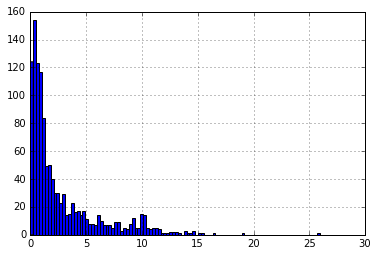

In [20]:
target_pos.target.hist(bins=100)
plt.show()

Analizamos las restantes variables

In [21]:
# Lista de campos

fieldslist = df.columns.tolist()

# Lista de variables categóricas

catfieldslist = fieldslist[2:11]

for i in catfieldslist:
    print(i)
    namefield = "df."+i
    print(df[i].unique())
    print("")
    df[i]

var1
['Z' '3' '2' '4' '1' '5']

var2
['Z' 'A' 'B' 'C']

var3
['Z' '4' '3' '5' '2' '6' '1']

var4
['N1' 'C1' 'J3' 'H1' 'A1' 'H2' 'E3' 'M1' 'R3' 'I1' 'J4' 'D3' 'R6' 'O2' 'F1'
 'R5' 'Z' 'H3' 'D1' 'P1' 'J5' 'J2' 'E2' 'S1' 'E1' 'L1' 'G1' 'D2' 'O1' 'B1'
 'G2' 'E6' 'K1' 'D4' 'E5' 'J1' 'E4' 'R7' 'R2' 'R8' 'J6' 'R1' 'R4']

var5
['Z' 'B' 'D' 'E' 'C' 'A' 'F']

var6
['Z' 'B' 'A' 'C']

var7
['3' '2' '4' '7' '5' '1' '6' '8' 'Z' 2L 6L 5L 4L 3L 7L 1L 8L]

var8
['1' '2' '4' '3' '6' 'Z' '5']

var9
['A' 'Z' 'B']



Los valores Z representan los nulos y se tratará como una categoría mas
La variable var7 presenta valores númericos y de texto, asumiendo que son
equivalentes, pondremos todos los valores como texto


In [22]:
df.var7=df.var7.astype(str)

In [23]:
# Variables Numéricas
numericlist = fieldslist[11:19]

# Comprobación de valores nulos en las variables

for i in numericlist:
    print(i)
    namefield = "df."+i
    print(df[i].isnull().unique())
    print("")
    df[i]




var10
[False]

var11
[False]

var12
[True False]

var13
[False]

var14
[False True]

var15
[False True]

var16
[True False]

var17
[False]



Las variables var12,var14,var15,var16 presentan valores nulos
que se sustituyen por la moda de cada variable

In [24]:
var12mode = df.var14.mode()[[0][0]]
var14mode = df.var14.mode()[[0][0]]
var15mode = df.var15.mode()[[0][0]]
var16mode = df.var16.mode()[[0][0]]

df.var12 = df.var14.fillna(var14mode)
df.var14 = df.var14.fillna(var14mode)
df.var15 = df.var15.fillna(var15mode)
df.var16 = df.var16.fillna(var16mode)



Variables Numéricas de criminalidad

In [25]:
crimevars = []
for i in fieldslist:
    if i.startswith('crime'):
               crimevars.append(i)

Comprobación de valores nulos en las variables

In [26]:

for i in crimevars:
    print(i)
    namefield = "df."+i
    print(df[i].isnull().unique())
    print("")
    df[i]

crimeVar1
[False True]

crimeVar2
[False True]

crimeVar3
[False True]

crimeVar4
[False True]

crimeVar5
[False True]

crimeVar6
[False True]

crimeVar7
[False True]

crimeVar8
[False True]

crimeVar9
[False True]



Sustituimos los nulos por la moda en las variables crime

In [27]:
for i in crimevars:
    print(i)
    i_mode = df[i].mode()[[0][0]]
    print(i_mode)
    df[i] = df[i].fillna(i_mode)

crimeVar1
0.8686512229
crimeVar2
0.6251862044
crimeVar3
0.6855345902
crimeVar4
0.6988892091
crimeVar5
1.3226499599
crimeVar6
1.0369530604
crimeVar7
0.7398308722
crimeVar8
1.2330044911
crimeVar9
0.9858519325


Variable dummy que no entra al modelo

In [28]:
df.dummy.unique()

array(['A', 'B'], dtype=object)

Variables Numéricas geodemográficas

In [29]:
geodemvars = []
for i in fieldslist:
    if i.startswith('geodem'):
               geodemvars.append(i)

Comprobación de valores nulos en las variables

In [30]:
for i in geodemvars:
    print(i)
    print(df[i].isnull().unique())
    print("")
    df[i]

geodemVar1
[False True]

geodemVar2
[False True]

geodemVar3
[False True]

geodemVar4
[False True]

geodemVar5
[False True]

geodemVar6
[False True]

geodemVar7
[False True]

geodemVar8
[False True]

geodemVar9
[False True]

geodemVar10
[False True]

geodemVar11
[False True]

geodemVar12
[False True]

geodemVar13
[False True]

geodemVar14
[False True]

geodemVar15
[False True]

geodemVar16
[False True]

geodemVar17
[False True]

geodemVar18
[False True]

geodemVar19
[False True]

geodemVar20
[False True]

geodemVar21
[False True]

geodemVar22
[False True]

geodemVar23
[False True]

geodemVar24
[False True]

geodemVar25
[False True]

geodemVar26
[False True]

geodemVar27
[False True]

geodemVar28
[False True]

geodemVar29
[False True]

geodemVar30
[False True]

geodemVar31
[False True]

geodemVar32
[False True]

geodemVar33
[False True]

geodemVar34
[False True]

geodemVar35
[False True]

geodemVar36
[False True]

geodemVar37
[False True]



Sustituimos los nulos por la moda en las variables geodemográficas

In [31]:
for i in geodemvars:
    print(i)
    i_mode = df[i].mode()[[0][0]]
    print(i_mode)
    df[i] = df[i].fillna(i_mode)


geodemVar1
7.3890578832
geodemVar2
1.1270957102
geodemVar3
1.1735784556
geodemVar4
0.9817835101
geodemVar5
7.9367599053
geodemVar6
7.3198929331
geodemVar7
0.8320533527
geodemVar8
8.0661893496
geodemVar9
1.0530160882
geodemVar10
8.6880134873
geodemVar11
8.5636161128
geodemVar12
0.6584255057
geodemVar13
8.3305728305
geodemVar14
0.9243408844
geodemVar15
7.4936188345
geodemVar16
0.8596425947
geodemVar17
8.1422164995
geodemVar18
3.3043314078
geodemVar19
1.0012661466
geodemVar20
0.0
geodemVar21
9.4703818767
geodemVar22
0.922754749
geodemVar23
0.9948257395
geodemVar24
0.97884262
geodemVar25
1.1500012499
geodemVar26
8.8523578634
geodemVar27
8.440231214
geodemVar28
7.6117972319
geodemVar29
0.0233987714
geodemVar30
1.2064256016
geodemVar31
0.3964678862
geodemVar32
4.4023403554
geodemVar33
7.807255389
geodemVar34
0.843524736
geodemVar35
9.4415651761
geodemVar36
0.0
geodemVar37
1.2364204065


Variables Numéricas de Meteorología

In [32]:
weathervars = []
for i in fieldslist:
    if i.startswith('weather'):
               weathervars.append(i)

Comprobación de valores nulos en las variables de meteorología

In [33]:
for i in weathervars:
    print(i)
    print(df[i].isnull().unique())
    print("")
    df[i]

weatherVar1
[False True]

weatherVar2
[False True]

weatherVar3
[False True]

weatherVar4
[False True]

weatherVar5
[False True]

weatherVar6
[False True]

weatherVar7
[False True]

weatherVar8
[False True]

weatherVar9
[False True]

weatherVar10
[False True]

weatherVar11
[False True]

weatherVar12
[False True]

weatherVar13
[False True]

weatherVar14
[False True]

weatherVar15
[False True]

weatherVar16
[False True]

weatherVar17
[False True]

weatherVar18
[False True]

weatherVar19
[False True]

weatherVar20
[False True]

weatherVar21
[False True]

weatherVar22
[False True]

weatherVar23
[False True]

weatherVar24
[False True]

weatherVar25
[False True]

weatherVar26
[False True]

weatherVar27
[False True]

weatherVar28
[False True]

weatherVar29
[False True]

weatherVar30
[False True]

weatherVar31
[False True]

weatherVar32
[False True]

weatherVar33
[False True]

weatherVar34
[False True]

weatherVar35
[False True]

weatherVar36
[False True]

weatherVar37
[False True]

weatherVar

Sustituimos los nulos por la moda en las variables meteorológicas

In [34]:
for i in weathervars:
    print(i)
    i_mode = df[i].mode()[[0][0]]
    print(i_mode)
    df[i] = df[i].fillna(i_mode)

weatherVar1
0.0
weatherVar2
0.0
weatherVar3
1.2440726039
weatherVar4
0.0
weatherVar5
0.9817525588
weatherVar6
0.0
weatherVar7
1.3519587015
weatherVar8
0.0
weatherVar9
0.0
weatherVar10
1.1388951227
weatherVar11
0.0
weatherVar12
0.7017804992
weatherVar13
0.0
weatherVar14
1.2025237389
weatherVar15
1.3050454884
weatherVar16
1.0679271169
weatherVar17
0.0
weatherVar18
1.3418373874
weatherVar19
0.0
weatherVar20
1.0252647892
weatherVar21
1.0581069433
weatherVar22
0.0
weatherVar23
1.1565017023
weatherVar24
0.0
weatherVar25
0.151958913
weatherVar26
0.909940957
weatherVar27
1.024223231
weatherVar28
1.8231577221
weatherVar29
0.0
weatherVar30
0.0
weatherVar31
0.0
weatherVar32
1.2715805128
weatherVar33
1.0728482574
weatherVar34
0.8877330776
weatherVar35
0.6108620605
weatherVar36
0.9745479561
weatherVar37
0.0248314172
weatherVar38
0.0
weatherVar39
0.0
weatherVar40
1.2717760474
weatherVar41
0.0
weatherVar42
0.8248852713
weatherVar43
0.0
weatherVar44
1.4552155447
weatherVar45
0.0
weatherVar46
0.0
weath

Conversión de variables categóricas en dummy

In [35]:
dfcat = pd.DataFrame(df,columns = catfieldslist)


In [36]:
dfcat.tail(7)

,var1,var2,var3,var4,var5,var6,var7,var8,var9
452054,Z,Z,Z,G1,Z,Z,2,2,B
452055,Z,Z,Z,H1,Z,Z,3,3,A
452056,Z,Z,Z,D3,Z,Z,3,2,A
452057,3,Z,Z,H1,Z,B,3,4,Z
452058,3,Z,3,I1,B,B,2,5,Z
452059,Z,Z,Z,H1,Z,Z,3,4,A
452060,Z,Z,Z,D1,Z,Z,4,1,A


In [37]:
dfcatdummies = pd.get_dummies(dfcat)

In [38]:
dfcatdummies.head(8)

,var1_1,var1_2,var1_3,var1_4,var1_5,var1_Z,var2_A,var2_B,var2_C,var2_Z,...,var8_1,var8_2,var8_3,var8_4,var8_5,var8_6,var8_Z,var9_A,var9_B,var9_Z
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
df = df.join(dfcatdummies)

In [40]:
catfieldslist

['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9']

In [41]:
dfcat

,var1,var2,var3,var4,var5,var6,var7,var8,var9
0,Z,Z,Z,N1,Z,Z,3,1,A
1,Z,Z,Z,C1,Z,Z,3,2,A
2,3,Z,4,J3,B,B,2,4,Z
3,3,Z,4,H1,B,Z,3,4,Z
4,Z,Z,Z,H1,Z,Z,2,4,A
5,Z,Z,Z,A1,Z,Z,4,2,A
6,Z,Z,Z,H2,Z,Z,3,3,A
7,Z,Z,Z,E3,Z,Z,3,3,A
8,Z,Z,Z,M1,Z,Z,3,1,B
9,Z,Z,Z,R3,Z,Z,3,1,A


Guardamos es un dataframe las modas de las variables

In [50]:
fieldslist = df.columns.tolist()
df_mode = pd.DataFrame()


for i in fieldslist:
    if i.startswith('id'):
        fieldslist.remove(i)


In [51]:
fieldslist

['target',
 'var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'var7',
 'var8',
 'var9',
 'var10',
 'var11',
 'var12',
 'var13',
 'var14',
 'var15',
 'var16',
 'var17',
 'dummy',
 'crimeVar1',
 'crimeVar2',
 'crimeVar3',
 'crimeVar4',
 'crimeVar5',
 'crimeVar6',
 'crimeVar7',
 'crimeVar8',
 'crimeVar9',
 'geodemVar1',
 'geodemVar2',
 'geodemVar3',
 'geodemVar4',
 'geodemVar5',
 'geodemVar6',
 'geodemVar7',
 'geodemVar8',
 'geodemVar9',
 'geodemVar10',
 'geodemVar11',
 'geodemVar12',
 'geodemVar13',
 'geodemVar14',
 'geodemVar15',
 'geodemVar16',
 'geodemVar17',
 'geodemVar18',
 'geodemVar19',
 'geodemVar20',
 'geodemVar21',
 'geodemVar22',
 'geodemVar23',
 'geodemVar24',
 'geodemVar25',
 'geodemVar26',
 'geodemVar27',
 'geodemVar28',
 'geodemVar29',
 'geodemVar30',
 'geodemVar31',
 'geodemVar32',
 'geodemVar33',
 'geodemVar34',
 'geodemVar35',
 'geodemVar36',
 'geodemVar37',
 'weatherVar1',
 'weatherVar2',
 'weatherVar3',
 'weatherVar4',
 'weatherVar5',
 'weatherVar6',
 'weatherVar7

In [52]:
for i in fieldslist:
    i_mode = df[i].mode()[[0][0]]
    df_mode[i] = [ i_mode ]


target
var1
var2
var3
var4
var5
var6
var7
var8
var9
var10
var11
var12
var13
var14
var15
var16
var17
dummy
crimeVar1
crimeVar2
crimeVar3
crimeVar4
crimeVar5
crimeVar6
crimeVar7
crimeVar8
crimeVar9
geodemVar1
geodemVar2
geodemVar3
geodemVar4
geodemVar5
geodemVar6
geodemVar7
geodemVar8
geodemVar9
geodemVar10
geodemVar11
geodemVar12
geodemVar13
geodemVar14
geodemVar15
geodemVar16
geodemVar17
geodemVar18
geodemVar19
geodemVar20
geodemVar21
geodemVar22
geodemVar23
geodemVar24
geodemVar25
geodemVar26
geodemVar27
geodemVar28
geodemVar29
geodemVar30
geodemVar31
geodemVar32
geodemVar33
geodemVar34
geodemVar35
geodemVar36
geodemVar37
weatherVar1
weatherVar2
weatherVar3
weatherVar4
weatherVar5
weatherVar6
weatherVar7
weatherVar8
weatherVar9
weatherVar10
weatherVar11
weatherVar12
weatherVar13
weatherVar14
weatherVar15
weatherVar16
weatherVar17
weatherVar18
weatherVar19
weatherVar20
weatherVar21
weatherVar22
weatherVar23
weatherVar24
weatherVar25
weatherVar26
weatherVar27
weatherVar28
weatherVar29
w

Eliminación de las variables categóricas

In [42]:
for i in catfieldslist:
    df = df.drop(i,axis=1)

In [43]:
df.shape

(452061, 383)

In [44]:
df.head(8)

,id,target,var10,var11,var12,var13,var14,var15,var16,var17,...,var8_1,var8_2,var8_3,var8_4,var8_5,var8_6,var8_Z,var9_A,var9_B,var9_Z
0,1,0.0,3.898949,705.907218,0.0,0.000000,0.0,29.0,100.0,84.337349,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,3.898949,778.939664,0.0,1.268636,0.0,23.0,100.0,100.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0.0,4.314082,686.728476,0.0,2.482178,0.0,10.0,100.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,4.314082,3515.206111,0.0,2.054144,0.0,22.0,100.0,100.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0.0,3.898949,1014.569367,0.0,0.832555,0.0,21.0,100.0,2.421308,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6,0.0,3.824453,721.110255,0.0,1.268636,0.0,11.0,100.0,80.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,0.0,3.898949,601.664358,0.0,0.832555,0.0,17.0,100.0,86.187845,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,0.0,4.171214,1040.951248,0.0,1.835019,0.0,28.0,100.0,100.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
df.to_csv("clean.csv",sep=";")

In [55]:
df_mode.to_csv("modetrain.csv",sep=";")